In [1]:
#Importing necessary Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape #size of DataFrame

(25, 2)

In [5]:
# To find the datatypes and missing values if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


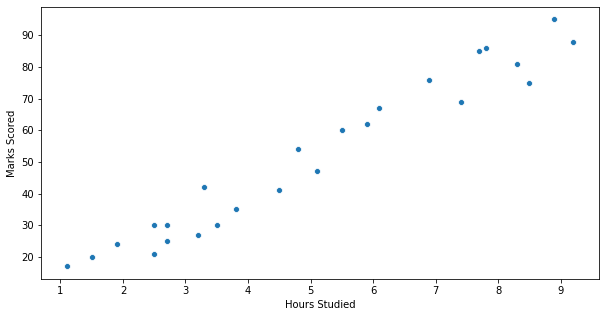

In [6]:
# Scatter plot to see the distribution of data
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Hours,y=df.Scores)
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  
plt.show()

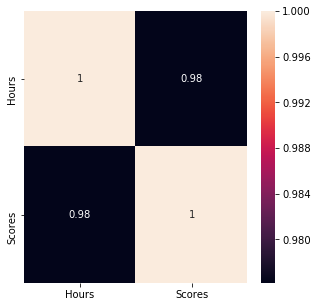

In [7]:
#correlation plot
plt.figure(figsize=(5,5))
correlation_matrix = df.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [8]:
# Dividing the DF to independent and dependent variable
X = df['Hours'].values.reshape(-1,1)
y = df['Scores']

In [9]:
# Spliting the X,y into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [10]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Creating object and fitting the model
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)

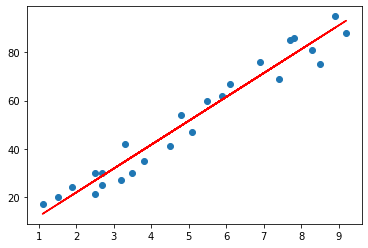

In [11]:
# Plotting the regression line
best_fitline = model.coef_*X+model.intercept_

# Plotting for the data
plt.scatter(X, y)
plt.plot(X, best_fitline, color = 'r');
plt.show()

In [12]:
# Predicting for test dataset
y_pred = model.predict(X_test)

In [13]:
# Creating Actual and Predicted dataset 
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [14]:
# Model Evaluation 

# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

MAE: 4.183859899002982
RMSE: 4.647447612100373
R-Square: 0.9454906892105354


In [15]:
# Testing with your own data
hours = np.array([9.25]) # No. of hours should be mentioned inside array
hours = hours.reshape(-1,1)
own_pred = model.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.69
